# 1, Giới thiệu

- Về cơ bản các phương pháp hồi quy là tìm ra 1 đường tuyến tính để phân chia dữ liệu, tuy nhiên đối với những dữ liệu phức tạp thì k thể tạo ra đường ranh giới tuyến tính này 

 --> Nhận thấy nếu kết hợp nhiều đường tuyến tính lại với nhau thì có thể giải quyết được bài toán này 

 --> thuật toán Neuron được sử dụng

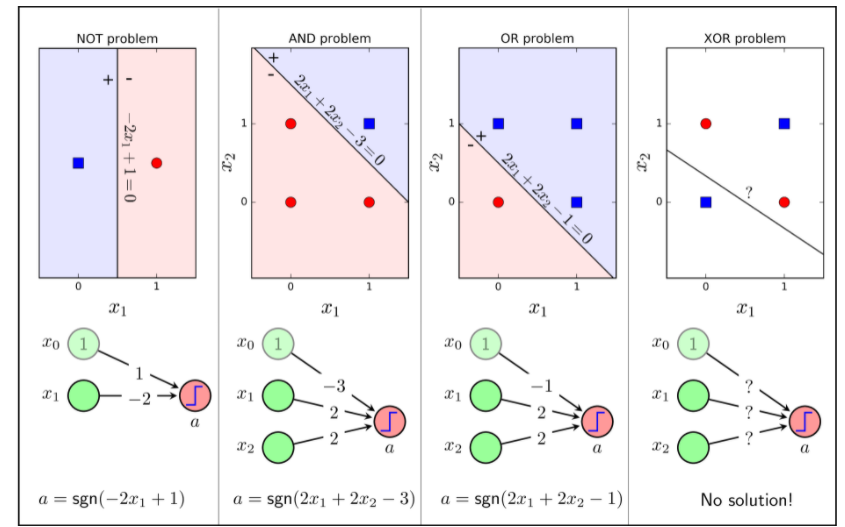

In [3]:
from IPython import display
display.Image("C:/Users/hoang/OneDrive/Máy tính/python/problem.png")

- Nếu xây dựng hàm tuyến tính thì k có đường nào có thể chia dữ liệu ra 2 phần hoàn hảo được, do vậy đối với bài toán này nếu có 2 đường -2x1 - 2x2 + 3 = 0 và 2x1+ 2x2 - 1= 0 thì có thể giải quyết được bài toán

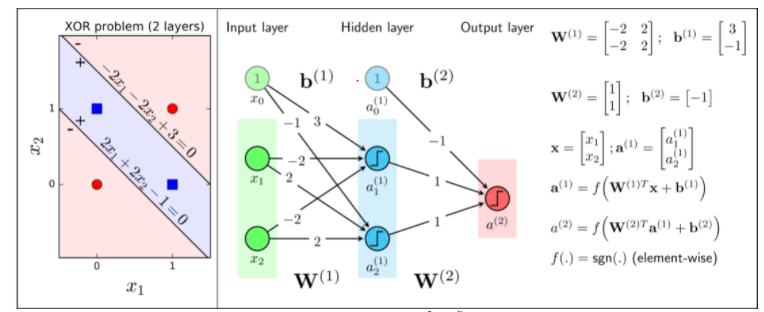

In [2]:
display.Image("C:/Users/hoang/OneDrive/Máy tính/python/neuron.png")

######  Lớp đầu tiên, các nút a(i) được tính:
a(1) = W1.x + b(1)

###### tại đầu ra

a(2) = W2.a1 + b(2)


###### ví dụ xác định nhãn 1 điểm có tọa độ (0.5, 0.5)
tại a1 = -2*0.5  -2*0.5 +3 = 1

tại a2 = 2*0.5 + 2*0.5 - 1 = 1

tại a = sgn(a1 + a2 + b1) = sgn(1 + 1 + -1) = 1  ---> thuộc vùng của điểm hình vuông

###### --->> Mục tiêu tối ưu được W và b tại các tầng để kết quả là tốt nhất


# 2: CÁC THÀNH PHẦN CHÍNH

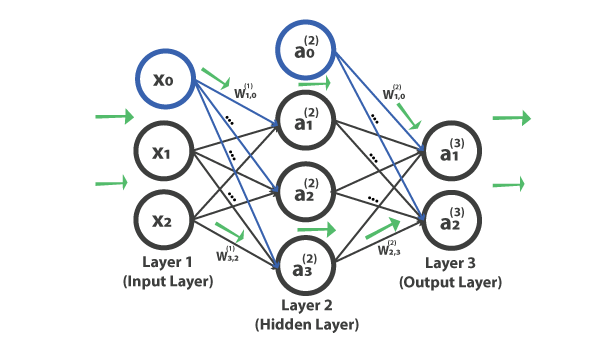

In [48]:
display.Image("neuron/model2.png")

######  Tầng ẩn
Giữ nhiệm vụ giải quyết những quan hệ phi tuyến phức tạp giữa các đặc điểm của dữ liệu bằng các hàm kích hoạt phi tuyến tính.
Tại sao phải là hàm phi tuyến tính: 

    - Nếu áp dụng 1 hàm tuyến tính vào đầu ra của mỗi neuron. Việc này không khác gì chúng ta thêm một tầng ẩn nữa vì phép  biến đổi cũng chỉ đơn thuần là nhân đầu ra với các weights. Với chỉ những phép tính đơn thuần như vậy, trên thực tế mạng neural sẽ không thể phát hiện ra những quan hệ phức tạp của dữ liệu.
    
    - Sự kết hợp của các activation functions giữa các tầng ẩn để giúp mô hình học được các quan hệ phi tuyến phức tạp tiềm ẩn trong dữ liệu
    
###### Số nút trong các tầng ẩn
    - Sử dụng quá ít đơn vị có thể dẫn đến việc không thể nhận dạng được các tín hiệu đầy đủ trong một tập dữ liệu phức tạp (underfitting). Sử dụng quá nhiều đơn vị sẽ tăng thời gian luyện mạng, có thể dẫn đến tình trạng overfitting\
    
    - Số lượng tốt nhất của các đơn vị ẩn phụ thuộc vào rất nhiều yếu tố - số đầu vào, đầu ra của mạng, số trường hợp trong tập mẫu, độ nhiễu của dữ liệu đích, độ phức tạp của hàm lỗi, kiến trúc mạng và thuật toán luyện mạng
    
    --> Cách tốt nhất là sử dụng phương pháp thử-sai (Tăng/giảm dần số lượng nút, ghi lại kết quả --> tốn thời gian nhưng sẽ giúp cải thiện model)
    
    

###### Hàm kích hoạt
Sau khi các neuron tầng trước đó tính toán, trả thông tin/kết quả --> ta cần tổng hợp lại và trả về 1 kết quả, khi đó ta sẽ có 1 hàm kích hoạt gọi là (a). Có nhiều loại hàm kích hoạt sử dụng trong phân loại đó là sigmoid, tanh, reLU( được sử dụng nhiều vì tính toán đạo hàm nhanh )

    - Hàm sigmoid:
        (-) khi giá trị output lớn --> đạo hàm bằng 0 --> cập nhật GD bị hạn chế
        (-) Không có tính chất Zero-Centered vì phạm vi của hàm là 0 đến 1 --> việc cập nhật sẽ chỉ diễn ra theo 1 số hướng nhất định, gây khó khăn cho việc hội tụ
        
    - Hàm Tanh:
        (-) Tương tự sigmoid bị bão hòa, đạo hàm = 0 khi output lớn --> cập nhật GD bị hạn chế
        (+) Hàm đối xứng qua điểm 0 do vậy khắc phục được hạn chế này của hàm sigmoid
        
    - Hàm Relu:
        (+) Tốc độ hội tụ nhanh do k bị bão hòa ở 2 đầu như sigmoid và tanh
        (+) Tính toán nhanh do k phải tính exp như sigmoid và tanh, đơn giản chỉ tìm max(0, value)
        (-) Với node < 0  qua hàm Relu sẽ bằng 0  --> Không được cập nhật GD --> các hàm biến đổi ReLU khác ra đời tuy nhiên hiệu quả chứng mình chưa thật sự rõ ràng 
        
        

--->> Lựa chọn hàm nào hợp lý thì phải thử, tùy vào độ phức tạp của model, số tầng ẩn, kết quả... để lựa chọn ra hàm kích hoạt tốt nhất.
        
        


# 3, Tối ưu bài toán

Phương pháp phổ biến nhất là lan truyền ngược và sử dụng Gradient descent. Tức là tính toán độ sai lệch ở tầng đầu ra trước sau đó điều chỉnh lùi lại các tầng trước đó. Phương pháp tính được thực hiện như sau:

###### Bước 1: Tính feedforward

Khởi tạo ngẫu nhiên các W, B. Với đầu vào X dự đoán giá trị Yhat

###### Bước 2: Tại output layer tính đạo hàm của hàm mất mát để cập nhật lại W và B

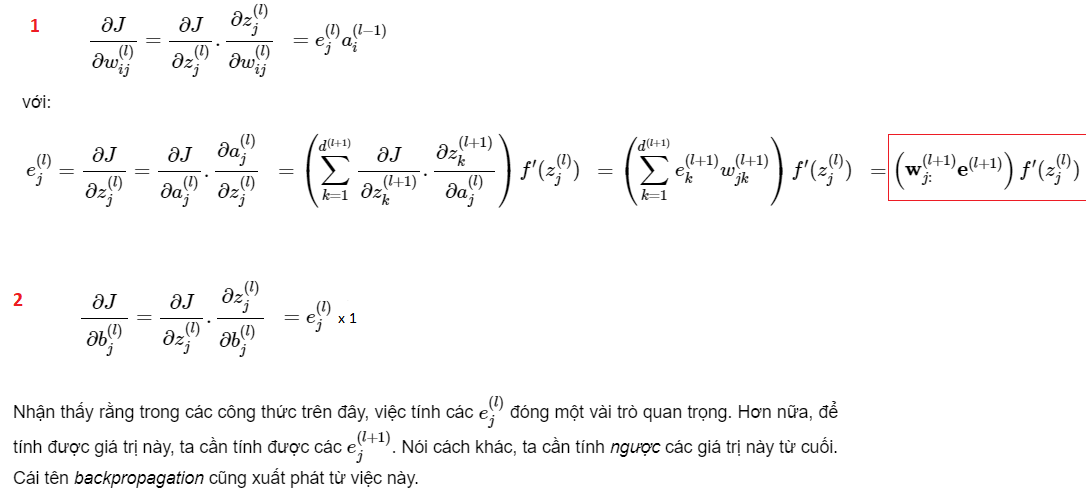

In [13]:
display.Image("neuron/daoham.png")

###### Bước 3: Xong khi tính toán đạo hàm hàm Loss theo b và w tại các tầng, tiến hành update GD cho các W và B

- W(L) += -eta* dW(L)
- b(L) += -eta* db(L)

Với L là số tầng, L = 1,2...L

# 4: Ví dụ

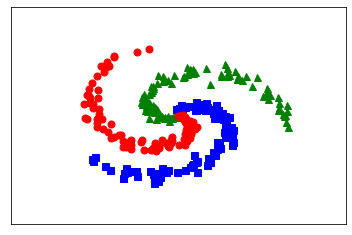

In [33]:
import math
import numpy as np 
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)  X.shape = (2,300)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [18]:
# truyền vào 1 array theo hàng sẽ trả ra kết quả xác suất theo softmax
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding đầu ra Y
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# loss function  
def cost(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

iter 0, loss: 1.098693
iter 1000, loss: 0.166023
iter 2000, loss: 0.054311
iter 3000, loss: 0.036451
iter 4000, loss: 0.029396
iter 5000, loss: 0.025680
iter 6000, loss: 0.023376
iter 7000, loss: 0.021764
iter 8000, loss: 0.020558
iter 9000, loss: 0.019616
training accuracy: 99.33 %
100


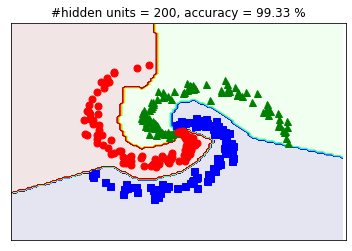

In [35]:
d0 = 2       # Chiều của đầu vào
d1 = h = 200 # Số nút tại layer
d2 = C = 3   # Số class phân loại

# Khởi tạo các W, B ngẫu nhiên
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

#Onehot coding đầu ra
Y = convert_labels(y, C)
N = X.shape[1]  # Số lượng biến
eta = 1 # learning rate 
for i in range(10000):
    ## Feedforward 
    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
        
    Yhat = softmax(Z2)  # Hàm kích hoạt đầu ra là hàm softmax
    
    # Tính toán loss
    loss = cost(Y, Yhat)
    
    # print loss after each 1000 iterations
    if i %1000 == 0: 
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLu, đạo hàm tại điểm <=0 bằng 0
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 

    W1 += -eta*dW1 
    b1 += -eta*db1 
    W2 += -eta*dW2
    b2 += -eta*db2 

Z1 = np.dot(W1.T, X) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc)


# Visualize 


xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)



xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)


X0 = np.vstack((xx1, yy1))


Z1 = np.dot(W1.T, X0) + b1 
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class 
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)


N = 100
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))

fn = 'ex_res'+ str(d1) + '.png'


plt.show()

# Sử dụng thư viện

In [125]:
from sklearn.neural_network import MLPClassifier

X_new = X.T
Y_new = np.asarray([0]*100 + [1]*100 + [2]*100)
alpha = 1e-1   #regulazation parameter

from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X_new,Y_new,test_size = 0.3, random_state= 0)

clf  = MLPClassifier(solver= 'lbfgs', alpha=alpha, activation = 'relu', hidden_layer_sizes = (50), max_iter=100000 )
#hidden_layer_sizes: số nút ẩn tại mỗi tầng ẩn, nếu chỉ có 1 thì nhập số nút là được, nhiều hơn sẽ kiểu (50,100) 1-50,2-100 


clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

metrics.accuracy_score(y_pred, y_test)*100


98.88888888888889

In [116]:
#Test LogisticRegression - multinomial

from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lgt.fit(x_train,y_train)
y_pred = lgt.predict(x_test)

metrics.accuracy_score(y_pred, y_test)*100

45.55555555555556

In [117]:
#Test KNN

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)

metrics.accuracy_score(y_pred, y_test)*100

97.77777777777777